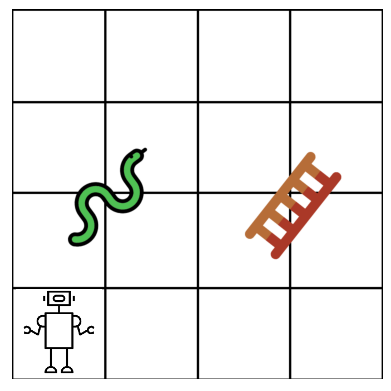

In [1]:
############ building the board ##############

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches

def plot_board(board_position):
    
    board_img = mpimg.imread('C://Users//ssisodi3//OneDrive - Cal State LA//Desktop//Ai pro//Working model//Snakes_and_ladder.png')
    agent_img = mpimg.imread('C://Users//ssisodi3//OneDrive - Cal State LA//Desktop//Ai pro//Working model//robot.png')

    fig, ax = plt.subplots()
    ax.imshow(board_img)

    # Grid 
    grid_size = (4, 4)
    cell_size_x = board_img.shape[1] / grid_size[1]
    cell_size_y = board_img.shape[0] / grid_size[0]

    # Agent position and placement
    agent_x = board_position[0] * cell_size_x + cell_size_x / 2
    agent_y = (grid_size[1] - board_position[1] - 1) * cell_size_y + cell_size_y / 2
    zoom_factor = 0.4  
    agent_imagebox = OffsetImage(agent_img, zoom=zoom_factor)
    agent_ab = AnnotationBbox(agent_imagebox, (agent_x, agent_y), frameon=False)
    ax.add_artist(agent_ab)


    plt.axis('off')
    plt.show()

# Render the board with the robot at position (0,0)
plot_board((0, 0))



In [2]:
################ Rewards and positions ###################

def next_step_reward(board_position,action):

  ladder_bottom = (2,1)
  ladder_top = (3,2)
  snake_head = (1,2)
  snake_tail = (0,1)
  grid_size = (4, 4)

  # action space
  action_space = {
      0:(-1,0), # left
      1:(1,0), # right
      2:(0,1), # up
      3:(0,-1), # down
  }

  # calculate the next position
  next_position = (board_position[0]+action_space[action][0],
                  board_position[1]+action_space[action][1])

  next_position = (max(0, min(next_position[0], grid_size[0] - 1)),
                max(0, min(next_position[1], grid_size[1] - 1)))


  # positions of ladders and snakes + rewards
  if next_position == ladder_bottom:
    next_position = ladder_top
    # ladder reward
    reward = 2 
  elif next_position == snake_head:
    next_position = snake_tail
    # snake negative reward
    reward = -2 
  elif next_position == (grid_size[0]-1, grid_size[1]-1):
    # winning reward
    reward = 5
  else:
    # standard step
    reward = -1 

  return next_position, reward



In [3]:
# initialize Q
Q={}

position= (0,0)

Q[(position,0)] = 0
Q[(position,1)] = 0
Q[(position,2)] = 0
Q[(position,3)] = 0

Q

{((0, 0), 0): 0, ((0, 0), 1): 0, ((0, 0), 2): 0, ((0, 0), 3): 0}

In [4]:
import random
import time
from IPython import display

def best_action(Q, state):
    
    # find the enteries in Q for the current state
    Q_state = {action: Q_value for (s, action), Q_value in Q.items() if s == state}

    # maximum Q-value 
    if Q_state != {}:
      max_Q = max(Q_state.values())
      actions = [action for action, Q_value in Q_state.items() if Q_value == max_Q]
    else:
      actions = [0,1,2,3]

    return random.choice(actions)

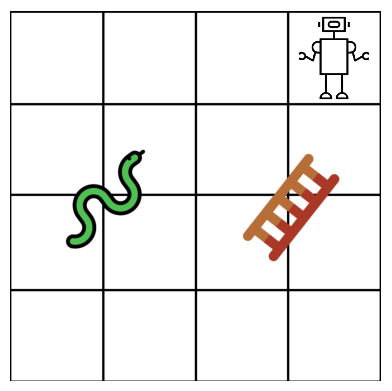

Total reward: 5


In [5]:
# 10 games ending with the rop right cell

games = 10
episodes = 0
reward_sum = 0

while episodes<games:
  print(f"Current episode: {episodes}")
  time.sleep(0.5)

  display.clear_output(wait=True)
  plot_board(position)

  if position == (3,3):
    print(f"Total reward: {reward_sum}")
    time.sleep(2)
    episodes += 1
    position = (0,0)
    reward_sum = 0


  action=best_action(Q,position)
  
  next_position, reward = next_step_reward(position,action)

  if (next_position, 0) not in Q:
    Q[(next_position,0)] = 0
    Q[(next_position,1)] = 0
    Q[(next_position,2)] = 0
    Q[(next_position,3)] = 0

  # update the Q-table 
  Q_max = max(Q[(next_position, 0)],
             Q[(next_position, 1)],
             Q[(next_position, 2)],
             Q[(next_position, 3)])
  
  Q[(position, action)] = reward + Q_max

  reward_sum += reward

  position = next_position




In [6]:
Q

{((0, 0), 0): -3,
 ((0, 0), 1): 5,
 ((0, 0), 2): -2,
 ((0, 0), 3): -3,
 ((1, 0), 0): -2,
 ((1, 0), 1): -1,
 ((1, 0), 2): 6,
 ((1, 0), 3): -2,
 ((1, 1), 0): -1,
 ((1, 1), 1): 7,
 ((1, 1), 2): -2,
 ((1, 1), 3): 0,
 ((0, 1), 0): -2,
 ((0, 1), 1): 1,
 ((0, 1), 2): -1,
 ((0, 1), 3): -1,
 ((0, 2), 0): -1,
 ((0, 2), 1): -3,
 ((0, 2), 2): 0,
 ((0, 2), 3): -2,
 ((3, 2), 0): 0,
 ((3, 2), 1): 0,
 ((3, 2), 2): 5,
 ((3, 2), 3): 0,
 ((3, 3), 0): 0,
 ((3, 3), 1): 0,
 ((3, 3), 2): 0,
 ((3, 3), 3): 0,
 ((2, 0), 0): 0,
 ((2, 0), 1): -1,
 ((2, 0), 2): 0,
 ((2, 0), 3): 0,
 ((3, 0), 0): 0,
 ((3, 0), 1): -1,
 ((3, 0), 2): -1,
 ((3, 0), 3): 0,
 ((3, 1), 0): 0,
 ((3, 1), 1): 0,
 ((3, 1), 2): 4,
 ((3, 1), 3): 0}

In [7]:
def optimal_path(Q, pos, path=None):
    if path is None:
        path = [pos]
    if pos == (3, 3):
        return path
    else:
        action = best_action(Q, pos)
        next_pos, _ = next_step_reward(pos, action)
        print(str(pos) + "->" + str(next_pos))
        path.append(next_pos)
        return optimal_path(Q, next_pos, path)

path = optimal_path(Q, (0, 0))
print("Optimal Path:", path)

(0, 0)->(1, 0)
(1, 0)->(1, 1)
(1, 1)->(3, 2)
(3, 2)->(3, 3)
Optimal Path: [(0, 0), (1, 0), (1, 1), (3, 2), (3, 3)]
